In [ ]:
import pandas as pd

df = pd.read_csv("gene_presence_absence.Rtab", sep="\t")
df.head()



,Gene,296-96,ES-CHC077,Eli4,Eli5,Eli6,F3201,JUNP353,R26
0,group_10,1,1,1,1,1,1,1,1
1,group_1000,1,1,1,1,1,1,1,1
2,group_1001,1,1,1,1,1,1,1,1
3,group_1002,1,1,1,1,1,1,1,1
4,group_1003,1,1,1,1,1,1,1,1


In [ ]:
X = df.set_index("Gene").T
X.head()


Gene,group_10,group_1000,group_1001,group_1002,group_1003,agaA_1,group_1005,group_1006,group_1007,oprM_4,...,group_64,group_6616,yagA_1,yagA_2,group_708,group_73,group_81,group_82,group_89,group_98
296-96,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
ES-CHC077,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Eli4,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Eli5,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Eli6,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Keep genes present in NOT ALL strains (remove core genes)
accessory = X.loc[:, X.sum(axis=0) < X.shape[0]]

print("Accessory genes matrix shape:", accessory.shape)

Accessory genes matrix shape: (8, 4002)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale (important even for binary)
X_scaled = StandardScaler().fit_transform(accessory)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance:", pca.explained_variance_ratio_)

Explained variance: [0.3584948  0.22370912]


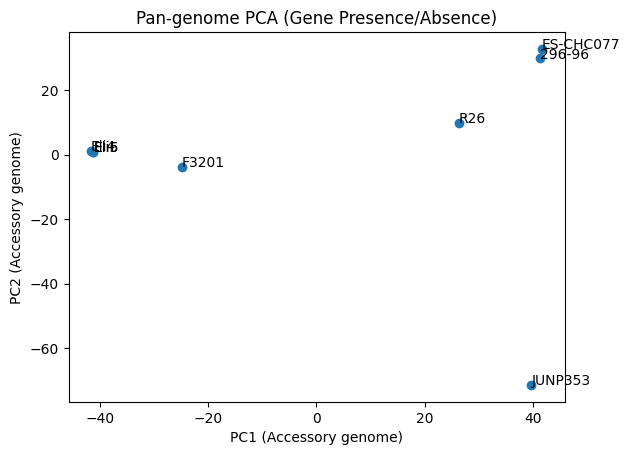

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

plt.scatter(X_pca[:,0], X_pca[:,1])

for i, strain in enumerate(accessory.index):
    plt.text(X_pca[i,0], X_pca[i,1], strain)

plt.xlabel("PC1 (Accessory genome)")
plt.ylabel("PC2 (Accessory genome)")
plt.title("Pan-genome PCA (Gene Presence/Absence)")

plt.show()